In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
bitcoin_data = pd.read_csv('C:/Users/johnkim/Downloads/비트코인 과거 데이터.csv')

In [66]:
bitcoin_data.describe()

,종가,시가,고가,저가,거래량,변동 %
count,2831.000000,2831.000000,2831.000000,2831.000000,2.831000e+03,2831.000000
mean,23178.785871,23157.754115,23705.407277,22569.921406,2.179641e+07,0.219848
std,19725.186302,19716.918545,20154.155220,19241.612248,2.053395e+08,3.811629
min,785.400000,785.400000,826.400000,739.500000,2.600000e+02,-39.180000
25%,7263.400000,7261.900000,7433.000000,7084.850000,7.095500e+04,-1.420000
50%,16512.300000,16467.900000,16781.100000,16100.100000,1.387100e+05,0.130000
75%,37396.500000,37379.300000,38407.850000,36322.250000,4.481250e+05,1.855000
max,73066.300000,73066.700000,73740.900000,71338.400000,4.470000e+09,25.560000


In [65]:
# Converting '거래량' values that contain 'K', 'M', or 'B' properly
bitcoin_data['거래량'] = bitcoin_data['거래량'].replace({'K': '*1000', 'M': '*1000000', 'B': '*1000000000'}, regex=True).map(pd.eval).astype(float)

# Checking if the conversion was successful and showing descriptive statistics
bitcoin_data.describe()

# Convert the columns to appropriate numeric formats
# First, removing commas and converting percentage to numeric values
bitcoin_data['종가'] = pd.to_numeric(bitcoin_data['종가'].str.replace(',', ''), errors='coerce')
bitcoin_data['시가'] = pd.to_numeric(bitcoin_data['시가'].str.replace(',', ''), errors='coerce')
bitcoin_data['고가'] = pd.to_numeric(bitcoin_data['고가'].str.replace(',', ''), errors='coerce')
bitcoin_data['저가'] = pd.to_numeric(bitcoin_data['저가'].str.replace(',', ''), errors='coerce')
bitcoin_data['변동 %'] = pd.to_numeric(bitcoin_data['변동 %'].str.replace('%', ''), errors='coerce')

In [32]:
bitcoin_data.rename(columns={'시가': 'Open', '고가': 'High', '저가': 'Low', '종가': 'Close', '날짜': 'Date', '거래량': 'Trade_Volume','변동 %': 'change_percent'}, inplace=True)

In [33]:
# Sorting the data based on the 'Date' column in ascending order, ensuring that the oldest data comes first.
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])  # Convert 'Date' to datetime if not already
bitcoin_data = bitcoin_data.sort_values(by='Date', ascending=True).reset_index(drop=True)

# Verifying that the data is now sorted correctly
bitcoin_data.head(), bitcoin_data.tail()

(        Date   Close    Open    High     Low  Trade_Volume  change_percent
 0 2017-01-01   995.4   963.4  1001.6   956.1       41150.0            3.33
 1 2017-01-02  1017.0   995.4  1031.7   990.2       64950.0            2.17
 2 2017-01-03  1033.3  1017.0  1035.5  1006.5       54790.0            1.60
 3 2017-01-04  1135.4  1033.3  1148.5  1022.3      156270.0            9.88
 4 2017-01-05   989.3  1135.4  1150.6   874.5      240010.0          -12.86,
            Date    Close     Open     High      Low  Trade_Volume  \
 2826 2024-09-27  65776.3  65168.8  66440.7  64839.2       80550.0   
 2827 2024-09-28  65866.5  65775.6  66232.5  65438.1       35000.0   
 2828 2024-09-29  65607.1  65862.8  66065.7  65436.8       32600.0   
 2829 2024-09-30  63339.2  65607.0  65607.0  62901.1      101700.0   
 2830 2024-10-01  60835.5  63329.9  64125.3  60195.9      134930.0   
 
       change_percent  
 2826            0.92  
 2827            0.14  
 2828           -0.39  
 2829           -3.46  
 

In [34]:
# up down 컬럼 생성 (다음 날의 주가를 예측하므로 하루씩 당겨서 생성)
bitcoin_data['rise_fall'] = bitcoin_data['Close'].shift(-1)

# NaN 값을 처리하고 비교를 수행하도록 수정
bitcoin_data['rise_fall'] = bitcoin_data.apply(lambda row: 'rise' if pd.notnull(row['rise_fall']) and row['rise_fall'] > row['Close'] else 'fall', axis=1)

# 마지막 날은 예측할 수 없으므로 제외
bitcoin_data = bitcoin_data[:-1]

bitcoin_data


,Date,Close,Open,High,Low,Trade_Volume,change_percent,rise_fall
0,2017-01-01,995.4,963.4,1001.6,956.1,41150.0,3.33,rise
1,2017-01-02,1017.0,995.4,1031.7,990.2,64950.0,2.17,rise
2,2017-01-03,1033.3,1017.0,1035.5,1006.5,54790.0,1.60,rise
3,2017-01-04,1135.4,1033.3,1148.5,1022.3,156270.0,9.88,fall
4,2017-01-05,989.3,1135.4,1150.6,874.5,240010.0,-12.86,fall
...,...,...,...,...,...,...,...,...
2825,2024-09-26,65175.7,63157.2,65770.9,62693.3,96060.0,3.20,rise
2826,2024-09-27,65776.3,65168.8,66440.7,64839.2,80550.0,0.92,rise
2827,2024-09-28,65866.5,65775.6,66232.5,65438.1,35000.0,0.14,fall
2828,2024-09-29,65607.1,65862.8,66065.7,65436.8,32600.0,-0.39,fall


In [35]:
# Convert '날짜' column to datetime and check the data
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'], errors='coerce')

# Drop rows with NaT in '날짜'
bitcoin_data = bitcoin_data.dropna(subset=['Date'])

# Set '날짜' as the index
bitcoin_data.set_index('Date', inplace=True)

In [67]:
# 데이터가 있는 칼럼을 '백만' 단위로 변환
bitcoin_data['Trade_Volume'] = bitcoin_data['Trade_Volume'] / 1e6

# 변환된 데이터를 시각화
fig, ax = plt.subplots()
ax.plot(bitcoin_data['Trade_Volume'])
ax.set_ylabel('Trade_Volume (M)')
ax.set_xlabel('Date')

plt.show()


KeyError: 'Trade_Volume'

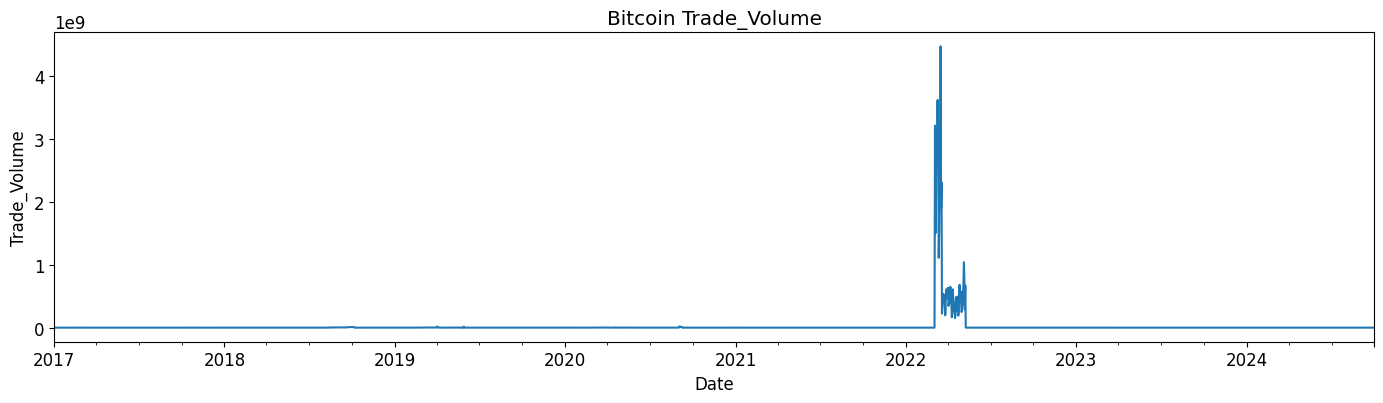

In [61]:
# Plotting
plt.figure(figsize=(14, 4.2))
bitcoin_data['Trade_Volume'].plot()
plt.title("Bitcoin Trade_Volume")
plt.xlabel("Date")
plt.ylabel("Trade_Volume")
plt.tight_layout()
plt.show()

C:\Users\johnkim\AppData\Local\Temp\ipykernel_30368\777367027.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Trade_Volume'])  # x축 레이블 설정


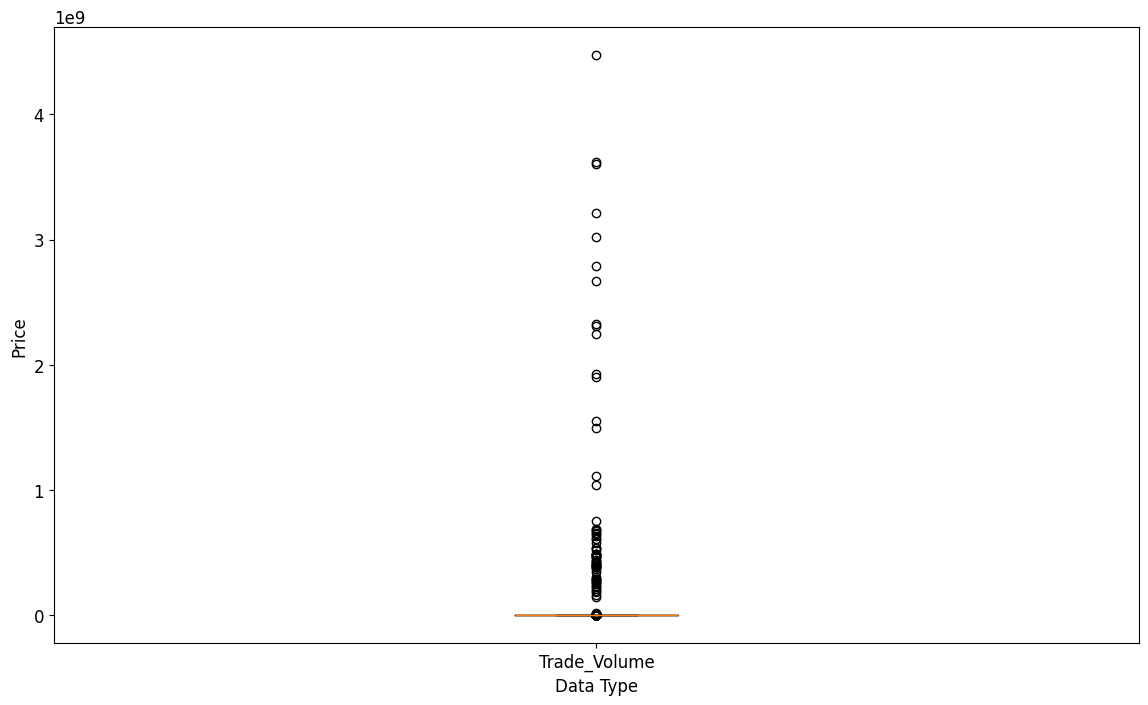

In [53]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# 3. 그래프 그리기
fig, ax = plt.subplots()
ax.set_xticklabels(['Trade_Volume'])  # x축 레이블 설정
ax.boxplot([bitcoin_data.Trade_Volume])
ax.set_xlabel('Column')
ax.set_xlabel('Data Type')
ax.set_ylabel('Price')

plt.show()

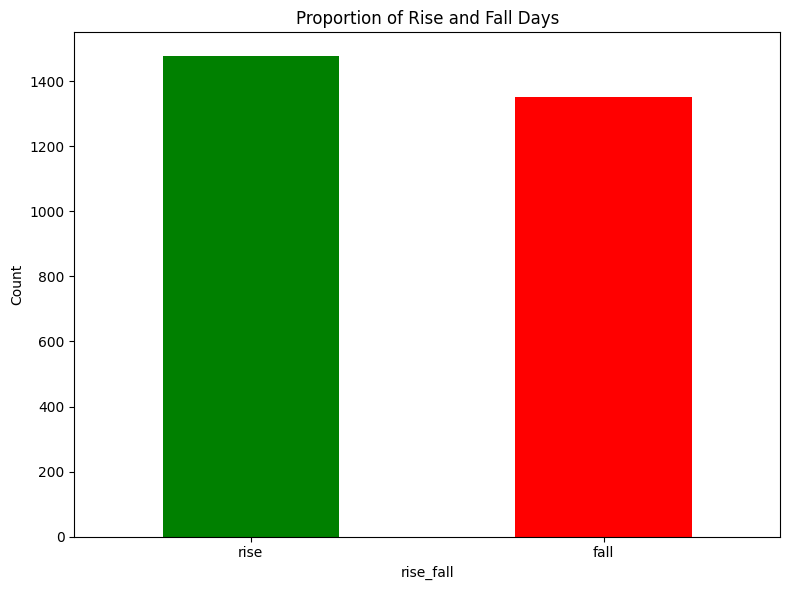

In [20]:

# Count the occurrences of '상승' and '하락'
up_down_counts = bitcoin_data['rise_fall'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
up_down_counts.plot(kind='bar', color=['green', 'red'])

# Add labels and title
plt.title('Proportion of Rise and Fall Days')
plt.xlabel('rise_fall')
plt.ylabel('Count')

# Rotate the x-axis and y-axis labels to be horizontal
plt.xticks(rotation=0)
plt.yticks(rotation=0)


# Show the plot
plt.tight_layout()
plt.show()


In [36]:
import mplfinance as mpf

import matplotlib.dates as mdates

c:\Users\johnkim\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


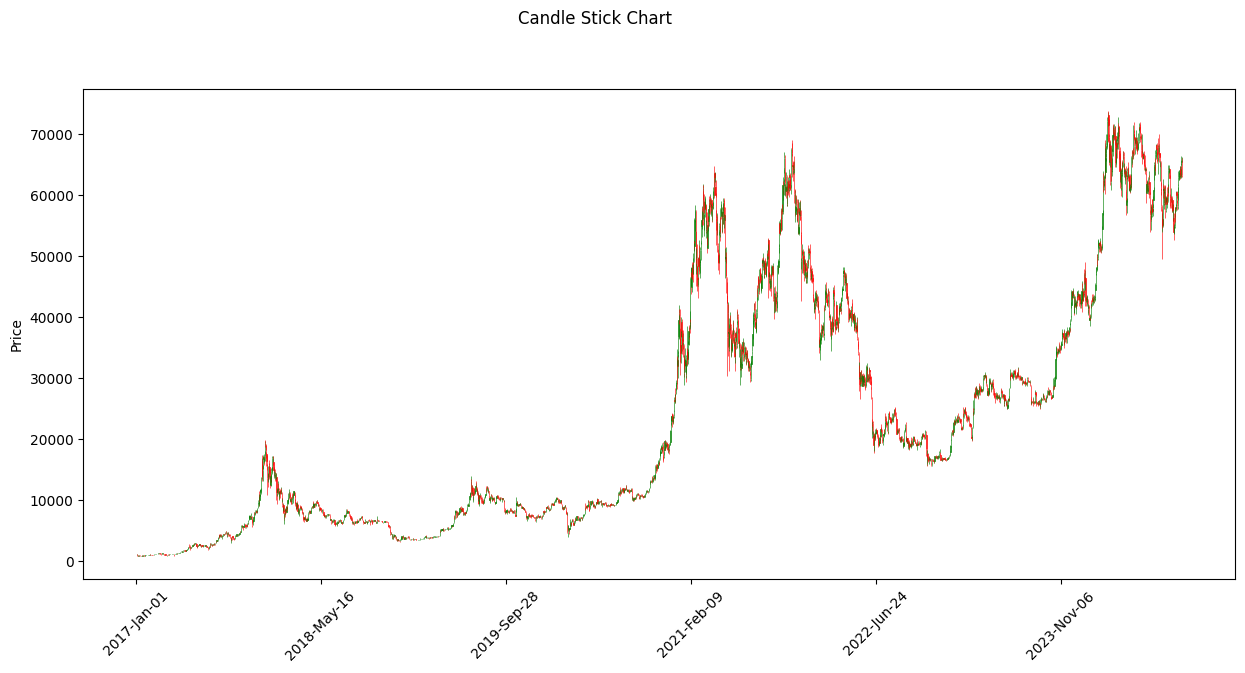

In [42]:
# Prepare the market colors
mc = mpf.make_marketcolors(up='green', down='red', inherit=True)

# Apply market colors to the style
s = mpf.make_mpf_style(marketcolors=mc)


# 캔들스틱 차트를 그립니다. 데이터를 역순으로 정렬합니다.
mpf.plot(
    bitcoin_data[['Open', 'High', 'Low', 'Close']].iloc[::1],  # 데이터를 반전시켜서 사용
    type='candle',
    style=s,
    title='Candle Stick Chart',
    ylabel='Price',
    figsize=(16, 7)  # 차트 크기 (너비 12인치, 높이 8인치)
)

In [9]:
bitcoin_data

,Close,Open,High,Low,Trade_Volume,change_percent,rise_fall
Date,,,,,,,
2024-10-01,60835.5,63329.9,64125.3,60195.9,134930.0,-3.95,rise
2024-09-30,63339.2,65607.0,65607.0,62901.1,101700.0,-3.46,rise
2024-09-29,65607.1,65862.8,66065.7,65436.8,32600.0,-0.39,rise
2024-09-28,65866.5,65775.6,66232.5,65438.1,35000.0,0.14,fall
2024-09-27,65776.3,65168.8,66440.7,64839.2,80550.0,0.92,fall
...,...,...,...,...,...,...,...
2017-01-06,886.2,989.3,1027.4,852.5,194290.0,-10.43,rise
2017-01-05,989.3,1135.4,1150.6,874.5,240010.0,-12.86,rise
2017-01-04,1135.4,1033.3,1148.5,1022.3,156270.0,9.88,fall


In [21]:
# CSV 파일을 저장할 경로 설정
file_path = ('C:/Users/johnkim/Downloads/clean_bitcoin_data.csv')  # 원하는 경로와 파일 이름 지정

# 데이터 프레임을 CSV 파일로 저장
bitcoin_data.to_csv(file_path, index=True)

In [11]:
EXR_data = pd.read_csv('C:/Users/johnkim/Downloads/USD_KRW 과거 데이터.csv')

In [12]:
EXR_data

,Date,EXR
0,2024-09-30\t,317.01
1,2024-09-27\t,308.30
2,2024-09-26\t,312.72
3,2024-09-25\t,333.54
4,2024-09-24\t,325.18
...,...,...
1981,2017-02-24\t,130.50
1982,2017-02-23\t,133.10
1983,2017-02-22\t,138.48
1984,2017-02-21\t,142.89
